In [1]:
import tkinter as tk
import graphviz as gv
import numpy as np
import matplotlib.pyplot as plt
import collections 
import heapq

In [2]:
class Nodohuff:
    def __init__(self, sym, frec, izq=None, der=None):
        self.sym = sym
        self.frec = frec
        self.izq = izq
        self.der = der
        self.dir= ''

    def __lt__(self, otro):
        return self.frec < otro.frec 

    def __repr__(self):
        return f"Nodohuff(sym={self.sym}, frec={self.frec})"
    
    def frecuencia_caracter(string):
        frecuencia_caracter = collections.Counter(string)
        #print(frecuencia_caracter)
        lista=[]
        for key, value in frecuencia_caracter.items():
            sym = key 
            frec = value
            nodo = Nodohuff(sym, frec)
            lista.append(nodo)
        tabla_frecuencia= plt.bar([nodo.sym for nodo in lista], [nodo.frec for nodo in lista],fc='Turquoise',ec='Black')
        plt.bar_label(tabla_frecuencia,labels=[nodo.frec for nodo in lista],label_type='edge',fontsize=12,padding=3)
        plt.title('Frecuencia Caracteres', fontsize=20)
        plt.xlabel('Caracteres')
        plt.ylabel('Frecuencia')
        plt.show()

        return lista
    
    def mkarbol_huff(string): 
        frecuencia_caracter = collections.Counter(string)

        no_usado = []
        for key, value in frecuencia_caracter.items():
            sym=key
            frec=value
            nodo= Nodohuff(sym, frec)
            #print (nodo)
            heapq.heappush(no_usado,nodo)
            #print(no_usado)
        return no_usado
    
    def sortarbol_huff(no_usado):
        while len(no_usado)>1:
            izq = heapq.heappop(no_usado)
            der = heapq.heappop(no_usado)
            #print(izq, der)
            izq.dir = '0'
            der.dir = '1'
            #print(no_usado)
            newnodo = Nodohuff(None, izq.frec + der.frec, izq, der)
            #print(newnodo)
            heapq.heappush(no_usado, newnodo)
            #print(no_usado)
        return no_usado
    
    def printnodos(nodo, val=''):
        newval=val+str(nodo.dir)

        if nodo.izq:
            Nodohuff.printnodos(nodo.izq, newval) 
        if nodo.der:
            Nodohuff.printnodos(nodo.der, newval)

        if(not nodo.izq and not nodo.der):
            print(f"{nodo.sym} -> {newval}")
        

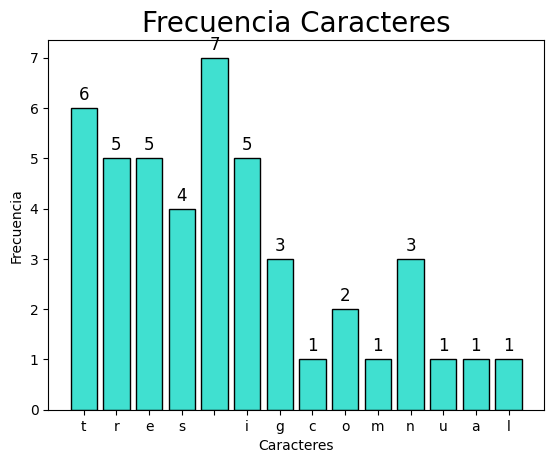

In [3]:
string = "tres tiristes tigres comen trigo en un trigal"

lista = Nodohuff.frecuencia_caracter(string)

In [4]:
no_usado = Nodohuff.mkarbol_huff(string)
#print(no_usado)

Nodohuff.sortarbol_huff(no_usado)
Nodohuff.printnodos(no_usado[0])

l -> 00000
a -> 00001
o -> 0001
e -> 001
i -> 010
r -> 011
n -> 1000
m -> 10010
c -> 100110
u -> 100111
t -> 101
g -> 1100
s -> 1101
  -> 111
